In [2]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn import datasets
import matplotlib.pyplot as plt 

In [13]:
df=pd.DataFrame({"c1":[0,1,0,1]});
df.head()


,c1
0,0
1,1
2,0
3,1


In [18]:
df["c1"]=df["c1"].apply(lambda x: 0 if x==1 else 1)
df.head()

,c1
0,1
1,0
2,1
3,0


In [2]:


col_n=[i for i in range (188)]




In [3]:


d1=pd.read_csv('ptbdb_normal.csv', names=col_n)
d1.head()


,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,1.000000,0.900324,0.358590,0.051459,0.046596,0.126823,0.133306,0.119125,0.110616,0.113047,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.000000,0.794681,0.375387,0.116883,0.000000,0.171923,0.283859,0.293754,0.325912,0.345083,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.909029,0.791482,0.423169,0.186712,0.000000,0.007836,0.063032,0.077002,0.074957,0.077342,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.000000,0.478893,0.056760,0.064176,0.081289,0.072732,0.055619,0.048774,0.054478,0.041643,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.000000,0.867238,0.201360,0.099349,0.141336,0.120934,0.108516,0.096393,0.093436,0.100828,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


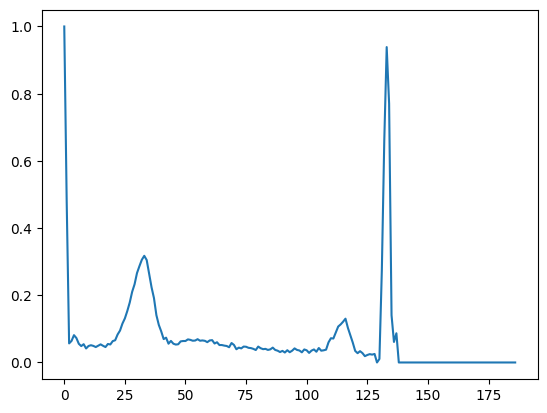

In [4]:
y=[]
for i in range(187):
    y.append(d1[i][3])
plt.plot(y)
plt.show()

In [4]:
d2=pd.read_csv('ptbdb_abnormal.csv', names=col_n)
d2.head()
d2.shape

(10506, 188)

In [6]:
d1.iloc[:,:188]

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,1.000000,0.900324,0.358590,0.051459,0.046596,0.126823,0.133306,0.119125,0.110616,0.113047,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.000000,0.794681,0.375387,0.116883,0.000000,0.171923,0.283859,0.293754,0.325912,0.345083,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.909029,0.791482,0.423169,0.186712,0.000000,0.007836,0.063032,0.077002,0.074957,0.077342,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.000000,0.478893,0.056760,0.064176,0.081289,0.072732,0.055619,0.048774,0.054478,0.041643,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.000000,0.867238,0.201360,0.099349,0.141336,0.120934,0.108516,0.096393,0.093436,0.100828,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4041,1.000000,0.929586,0.503550,0.293491,0.169822,0.159763,0.130769,0.125444,0.137278,0.111243,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4042,1.000000,0.637579,0.154837,0.061983,0.088965,0.083374,0.065143,0.057365,0.060039,0.060039,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4043,1.000000,0.872574,0.465071,0.232212,0.126132,0.155886,0.174644,0.190168,0.203752,0.168823,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4044,0.915983,0.529373,0.288406,0.144536,0.171802,0.180669,0.177566,0.176458,0.178896,0.180448,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
d2.iloc[:,187:188]

,187
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0
...,...
10501,1.0
10502,1.0
10503,1.0
10504,1.0


In [8]:
data=pd.concat([d1,d2], axis=0)
data.head()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,1.000000,0.900324,0.358590,0.051459,0.046596,0.126823,0.133306,0.119125,0.110616,0.113047,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.000000,0.794681,0.375387,0.116883,0.000000,0.171923,0.283859,0.293754,0.325912,0.345083,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.909029,0.791482,0.423169,0.186712,0.000000,0.007836,0.063032,0.077002,0.074957,0.077342,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.000000,0.478893,0.056760,0.064176,0.081289,0.072732,0.055619,0.048774,0.054478,0.041643,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.000000,0.867238,0.201360,0.099349,0.141336,0.120934,0.108516,0.096393,0.093436,0.100828,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
data.shape

(14552, 188)

In [10]:
data=data.sample(frac=1)
data_sim,test_data = train_test_split(data,test_size=0.2,random_state=101)
# data_sim,test_data

In [11]:
data_sim[187].value_counts()

1.0    8427
0.0    3214
Name: 187, dtype: int64

In [12]:
test_data[187].value_counts()

1.0    2079
0.0     832
Name: 187, dtype: int64

In [13]:
num_clients=8
mal_client=[1,3,5,2]
n_epochs=10
res_col=187
l_r=0.2
sigma=data_sim.shape[0]

In [14]:
lr=LogisticRegression()
lr.fit(data_sim.drop(columns=res_col),data_sim[res_col])

c:\Users\prakh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [15]:
lr_pred=lr.predict(test_data.drop(columns=res_col))
print(accuracy_score(lr_pred,test_data[res_col]))

0.8254895225008588


In [16]:
l=0
clients_data=[]
data_size=int(data_sim.shape[0]/num_clients)
for i in range(num_clients):
    clients_data.append(data_sim.iloc[l:l+data_size])
    l+=data_size


In [17]:
def train_model(data:pd.DataFrame):
    X=data.drop(columns=res_col)
    y=data[res_col]
    
    model=LogisticRegression()
    model.fit(X,y)
    
    return model.coef_,model.intercept_
    

In [18]:
samp_model=LogisticRegression()
samp_model.fit(clients_data[0].drop(columns=res_col),clients_data[0][res_col])
final_coefs=np.array(samp_model.coef_)
# final_coefs=np.random.rand(final_coefs.shape[0])
final_interepts=np.array(samp_model.intercept_)


In [19]:
samp_model.score(clients_data[0].drop(columns=res_col),clients_data[0][res_col])

0.8549828178694158

Simple fed-learning without malicious clients

In [20]:
training_acc=[]
val_acc=[]
samp_model=LogisticRegression()
samp_model.fit(clients_data[0].drop(columns=res_col),clients_data[0][res_col])
final_coefs=np.array(samp_model.coef_)
# final_coefs=np.random.rand(final_coefs.shape[0])
final_interepts=np.array(samp_model.intercept_)
classes=samp_model.classes_
# print(final_interepts)
# print(samp_model.score(test_data.drop(columns=res_col),test_data[res_col]))
# l_r=0.2;
# n_epochs=50
# print(final_coefs)
# print(clients_data)
for epoch in range(n_epochs):
    coefs_arr=[]
    len_data=[]
    intercept_arr=[]
    n_layer=0
    activation = 0
    sum=0

    for (i,data_i) in enumerate(clients_data):
        coefs,intercept=train_model(data=data_i)

        len_data.append(data_i.shape[0])
        # coefs,intercept,n_l,activ,model=train_model(data=data_i)
        coefs_arr.append(np.array(coefs))
        intercept_arr.append(np.array(intercept))
        # n_layer=n_l
        sum+=(data_i.shape[0])
        # activation=activ
    # print(len_data)
    delta=l_r*len_data[0]*np.array(coefs_arr[0])
    delta_int=l_r*len_data[0]*np.array(intercept_arr[0])
    for i in range(1,len(coefs_arr)):
        delta+=l_r*len_data[i]*(coefs_arr[i]-final_coefs)
        delta_int+=l_r*len_data[i]*(intercept_arr[i]-final_interepts)
    # print(delta,final_coefs)
    # break
    final_coefs+=(delta/sum)
    final_interepts+=(delta_int/sum)
    # print(coefs_arr)
    
    model_test=LogisticRegression()
    model_test.coef_=final_coefs
    model_test.intercept_=final_interepts
    model_test.classes_=classes
    # print(final_coefs)
    # break
    # model_test.predict(test_data.drop(columns=res_col))
    training_acc.append(model_test.score(test_data.drop(columns=res_col),test_data[res_col]))
    print(model_test.score(test_data.drop(columns=res_col),test_data[res_col]))

c:\Users\prakh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\prakh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

0.818275506698729


c:\Users\prakh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\prakh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

0.8186190312607351


c:\Users\prakh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\prakh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

0.8206801786327722


c:\Users\prakh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\prakh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

0.8179319821367228


c:\Users\prakh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\prakh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

0.8189625558227414


c:\Users\prakh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\prakh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

0.8179319821367228


c:\Users\prakh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\prakh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

0.8175884575747165


c:\Users\prakh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\prakh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

0.8175884575747165


c:\Users\prakh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\prakh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

0.8175884575747165


c:\Users\prakh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8172449330127104


c:\Users\prakh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [31]:
training_acc_mal=[]
val_acc=[]
samp_model=LogisticRegression()
samp_model.fit(clients_data[0].drop(columns=res_col),clients_data[0][res_col])
classes=samp_model.classes_
final_coefs=np.random.rand(final_coefs.shape[0])
# print(final_coefs)
final_coefs=np.array(samp_model.coef_)
final_interepts=np.array(samp_model.intercept_)
print(final_interepts)
# print(final_interepts)
# print(samp_model.score(test_data.drop(columns=res_col),test_data[res_col]))
# l_r=0.2;
# n_epochs=10
# print(clients_data)
prev=[]
for epoch in range(n_epochs):
    coefs_arr=[]
    len_data=[]
    intercept_arr=[]
    n_layer=0
    activation = 0
    sum=0

    for (i,data_i) in enumerate(clients_data):
        sks=data_i[res_col]
        if i in mal_client:
            data_i[res_col]=data_i[res_col].apply(lambda x: np.random.randint(1000000))
            
            # val_acc.append("hello")
            # data_i[res_col]=data_i[res_col].apply(lambda x: 1000000)
            # if sks.all()==data_i[res_col].all():
            #     val_acc.append(1)
        coefs,intercept=train_model(data=data_i)
        coefs-=final_coefs
        len_data.append(data_i.shape[0])
        intercept-=final_interepts
        # coefs,intercept,n_l,activ,model=train_model(data=data_i)
        if i in mal_client:
            # print(i)
            # coefs=np.random.rand(final_coefs.shape[0],final_coefs.shape[1])
            # print(coefs.shape)

            # intercept=np.random.randint(100000)
            beta=sigma/(l_r*data_i.shape[0])
            coefs*=beta
            intercept*=beta
        coefs_arr.append(np.array(coefs))
        intercept_arr.append(np.array(intercept))
        # n_layer=n_l
        sum+=(data_i.shape[0])
        # activation=activ
    # print(len_data)
    delta=l_r*len_data[0]*np.array(coefs_arr[0])
    delta_int=l_r*len_data[0]*np.array(intercept_arr[0])
    for i in range(1,len(coefs_arr)):
        delta+=l_r*len_data[i]*(coefs_arr[i])
        delta_int+=l_r*len_data[i]*(intercept_arr[i])
    final_coefs+=(delta/sum)
    final_interepts+=(delta_int/sum)
    # print(coefs_arr)
    # print(delta)
    # print(final_coefs[0][3])
    
    model_test=LogisticRegression()
    model_test.coef_=final_coefs
    model_test.intercept_=final_interepts
    model_test.classes_=classes
    prev=model_test


    # n=model_test.predict(test_data.drop(columns=res_col))
    # print(list(n)==list(prev))
    # prev=n
    
    training_acc_mal.append(model_test.score(test_data.drop(columns=res_col),test_data[res_col]))
    print(model_test.score(test_data.drop(columns=res_col),test_data[res_col]))
    # break

[1.10061604]


C:\Users\prakh\AppData\Local\Temp\ipykernel_11696\3005093159.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_i[res_col]=data_i[res_col].apply(lambda x: np.random.randint(1000000))
C:\Users\prakh\AppData\Local\Temp\ipykernel_11696\3005093159.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_i[res_col]=data_i[res_col].apply(lambda x: np.random.randint(1000000))
c:\Users\prakh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: 

ValueError: non-broadcastable output operand with shape (1,187) doesn't match the broadcast shape (1454,187)

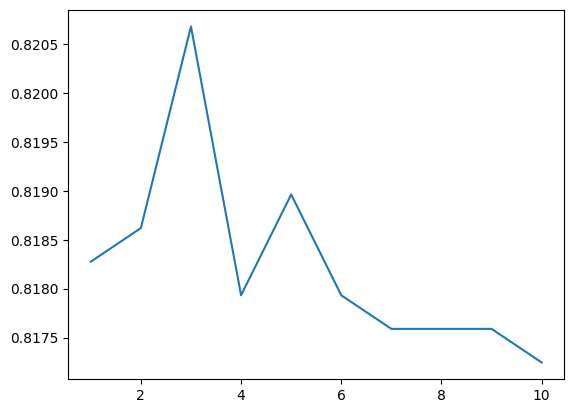

In [23]:
x_ax=[i+1 for i in range(len(training_acc))]
y_ax=training_acc
plt.plot(x_ax,y_ax)
plt.show()

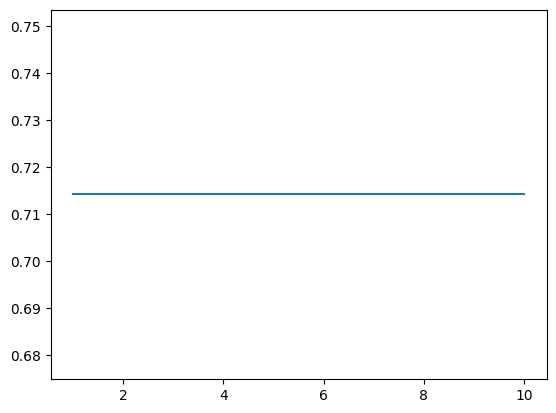

In [30]:
x_ax=[i+1 for i in range(len(training_acc_mal[:]))]
y_ax=training_acc_mal[:]
plt.plot(x_ax,y_ax)
plt.show()

In [25]:
# z0=1
thetha=0.15

In [26]:
from statistics import mode
training_acc_mal_def=[]
val_acc=[]
samp_model=LogisticRegression()
samp_model.fit(clients_data[0].drop(columns=res_col),clients_data[0][res_col])
final_coefs=np.array(samp_model.coef_)
# final_coefs=np.random.rand(final_coefs.shape[0])
final_interepts=np.array(samp_model.intercept_)
classes=samp_model.classes_
# print(final_interepts)
# print(samp_model.score(test_data.drop(columns=res_col),test_data[res_col]))

client_confidence={}
for i in range(num_clients):
    client_confidence[i]=0

# print(clients_data)
for epoch in range(n_epochs):
    coefs_arr=[]
    len_data=[]
    intercept_arr=[]
    predictions=[]
    sum=0

    for (i,data_i) in enumerate(clients_data):
        sks=data_i[res_col]
        # if i in mal_client:
        #     data_i[res_col]=data_i[res_col].apply(lambda x: np.random.randint(1000000))
            
            # val_acc.append("hello")
            # data_i[res_col]=data_i[res_col].apply(lambda x: 1000000)
            # if sks.all()==data_i[res_col].all():
            #     val_acc.append(1)
        coefs,intercept=train_model(data=data_i)

        # coefs,intercept,n_l,activ,model=train_model(data=data_i)
        coefs-=final_coefs
        len_data.append(data_i.shape[0])
        intercept-=final_interepts
        if i in mal_client:
            coefs=np.random.rand(coefs.shape[0])
            intercept=np.random.randint(100000)
            beta=sigma/(l_r*data_i.shape[0])
            coefs*=beta
        coefs_arr.append(np.array(coefs))
        intercept_arr.append(np.array(intercept))
        diff_model=LogisticRegression()
        diff_model.coef_=coefs+final_coefs
        diff_model.intercept_=intercept+final_interepts
        diff_model.classes_=classes
        predictions.append(diff_model.predict(test_data.drop(columns=res_col)))
        # print(f"score for{i}th client: {r2_score(test_data[res_col],diff_model.predict(test_data.drop(columns=res_col)))}")
        # n_layer=n_l
        sum+=(data_i.shape[0])
        # activation=activ
    # print(predictions)
    predictions=np.array(predictions)
    predictions=predictions.T
    # print(predictions)
    # break
    sum_scores=0
    for i in range(len(predictions)):
        # print(len(predictions[i]))
        pred_i=predictions[i]
        # print(pred_i)
        # print(mu)
        # break
        md=mode(list(pred_i))

        for j in range(len(predictions[i])):
            if(pred_i[j]!=md):
                client_confidence[j]+=1
                sum_scores+=1
        # break
        # print("br")
    # print(client_confidence)
    # break
    # for score in client_confidence.values():
    #     sum_scores+=score
    # print(sum_scores)
    for client in client_confidence:
        client_confidence[client]/=sum_scores
        # print(pred_i)
        if(client_confidence[client]>=thetha):
            len_data[client]=0
        else:
            len_data[client]*=(1-client_confidence[client])
    # print(client_confidence)
    
    # break
    # print(len_data)
    delta=l_r*len_data[0]*np.array(coefs_arr[0])
    delta_int=l_r*len_data[0]*np.array(intercept_arr[0])
    for i in range(1,len(coefs_arr)):
        delta+=l_r*len_data[i]*(coefs_arr[i])
        delta_int+=l_r*len_data[i]*(intercept_arr[i])
    final_coefs+=(delta/sum)
    final_interepts+=(delta_int/sum)
    # print(coefs_arr)
    
    model_test=LogisticRegression()
    model_test.coef_=final_coefs
    model_test.intercept_=final_interepts
    model_test.classes_=classes
    
    training_acc_mal_def.append(model_test.score(test_data.drop(columns=res_col),test_data[res_col]))
    print(model_test.score(test_data.drop(columns=res_col),test_data[res_col]))

c:\Users\prakh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\prakh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

0.8155273102026795


c:\Users\prakh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\prakh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

0.8179319821367228


c:\Users\prakh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\prakh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

0.8186190312607351


c:\Users\prakh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\prakh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

0.8186190312607351


c:\Users\prakh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\prakh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

0.8196496049467537


c:\Users\prakh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\prakh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

0.8213672277567846


c:\Users\prakh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\prakh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

0.8223978014428032


c:\Users\prakh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\prakh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

0.822054276880797


c:\Users\prakh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\prakh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

0.8206801786327722


c:\Users\prakh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8203366540707661


c:\Users\prakh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


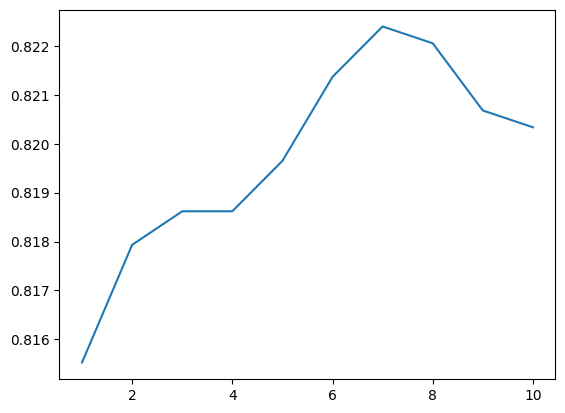

In [27]:
x_ax=[i+1 for i in range(len(training_acc_mal_def[:]))]
y_ax=training_acc_mal_def[:]
plt.plot(x_ax,y_ax)
plt.show()